
# Workshop 1: Introduction to PyTorch and Deep Learning on DNA Sequences

Welcome to this workshop! In this session, you'll learn how to use PyTorch to build, train, and evaluate neural networks for taxonomic classification of DNA sequences.
The workshop is structured into two main parts:

1. **Introduction to PyTorch**: Covering tensors, the `nn` module, a toy dataset, and building a training loop.
2. **DNA Sequence Classification**: Loading and processing DNA sequences from a FASTA file, exploring sequence data, computing k-mers, and building a neural network for classification.

---

Let's get started! Make sure you have PyTorch installed to run the code cells in this notebook.



## Part 1: Introduction to PyTorch

In this part, we'll learn the fundamentals of PyTorch, starting with tensors, the building blocks for any deep learning framework.



### 1.1 Tensors and PyTorch Basics

Tensors are multi-dimensional arrays and are the primary data structure in PyTorch. You can think of them as similar to NumPy arrays, but they are optimized for GPU operations.

Let's create some basic tensors and perform operations on them.


In [1]:

import torch

# Create a tensor
tensor_a = torch.tensor([[1, 2], [3, 4]])
print("Tensor A:\n", tensor_a)

# Creating a random tensor
random_tensor = torch.rand((3, 3))
print("\nRandom Tensor:\n", random_tensor)

# Basic tensor operations
sum_tensor = tensor_a + tensor_a
print("\nSum of Tensors:\n", sum_tensor)

Tensor A:
 tensor([[1, 2],
        [3, 4]])

Random Tensor:
 tensor([[0.3419, 0.3777, 0.2065],
        [0.0987, 0.0702, 0.2707],
        [0.4607, 0.2155, 0.4208]])

Sum of Tensors:
 tensor([[2, 4],
        [6, 8]])


>### Exercise: Create your own tensors and try different operations!


### Additional Tensor Operations: Reshaping, Slicing, and Element-wise Operations

In this section, we'll explore a few more tensor operations that are commonly used in deep learning workflows.

#### Reshaping
PyTorch provides ways to change the shape of a tensor without altering its data, such as using `.view()` or `.reshape()`.

#### Slicing and Indexing
You can select parts of tensors using slicing, similar to how you would slice arrays in NumPy.

#### Element-wise Operations
PyTorch supports element-wise operations, such as addition, subtraction, multiplication, etc.


In [2]:

# Reshaping Tensors
tensor_a = torch.arange(16)  # Create a 1D tensor with values 0 to 15
print("Original Tensor:", tensor_a)

reshaped_tensor = tensor_a.view(4, 4)  # Reshape to 4x4
print("Reshaped Tensor (4x4):\n", reshaped_tensor)

# Slicing and Indexing
print("\nSelecting the first row:", reshaped_tensor[0])         # Select first row
print("Selecting the first column:", reshaped_tensor[:, 0])      # Select first column
print("Selecting a sub-tensor:\n", reshaped_tensor[1:3, 1:3])  # Select a 2x2 sub-tensor

# Element-wise Operations
tensor_b = torch.tensor([[2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4], [5, 5, 5, 5]])
print("\nTensor B:\n", tensor_b)

added_tensor = reshaped_tensor + tensor_b
print("\nElement-wise Addition:\n", added_tensor)

multiplied_tensor = reshaped_tensor * tensor_b
print("Element-wise Multiplication:\n", multiplied_tensor)

Original Tensor: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
Reshaped Tensor (4x4):
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

Selecting the first row: tensor([0, 1, 2, 3])
Selecting the first column: tensor([ 0,  4,  8, 12])
Selecting a sub-tensor:
 tensor([[ 5,  6],
        [ 9, 10]])

Tensor B:
 tensor([[2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4],
        [5, 5, 5, 5]])

Element-wise Addition:
 tensor([[ 2,  3,  4,  5],
        [ 7,  8,  9, 10],
        [12, 13, 14, 15],
        [17, 18, 19, 20]])
Element-wise Multiplication:
 tensor([[ 0,  2,  4,  6],
        [12, 15, 18, 21],
        [32, 36, 40, 44],
        [60, 65, 70, 75]])


> ### Exercise: Try reshaping, slicing, and performing element-wise operations with different dimensions!


### 1.2 The `nn` Module and Building a Simple Neural Network

PyTorch provides the `torch.nn` module to help define neural networks. Let's define a simple fully connected neural network and explore its components.

Below is a simple feed-forward neural network with a couple of layers. We'll define this model and briefly discuss the components.


In [3]:

import torch.nn as nn

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
model = SimpleNN(input_size=10, hidden_size=20, num_classes=3)
print(model)


SimpleNN(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=3, bias=True)
)



### 1.3 Creating a Toy Dataset

Let's create a small random dataset for classification. This will help us understand how the training loop and loss function work.


In [4]:

from sklearn.datasets import make_classification
import torch
from torch.utils.data import TensorDataset, DataLoader

# Generate a toy dataset with 3 classes
X, y = make_classification(n_samples=100, n_features=10, n_classes=3, n_informative=5)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create a DataLoader for batching
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Print a sample batch
for batch in dataloader:
    print("Sample batch:", batch)
    break


Sample batch: [tensor([[-3.8080e-01, -2.1356e-03,  8.1096e-01, -1.8996e+00,  8.4224e-02,
         -2.5316e+00,  9.5041e-01,  1.2297e+00, -2.1863e+00,  6.1889e-01],
        [ 1.4225e+00, -6.4338e-01, -3.1275e+00,  2.1705e+00, -1.0950e+00,
          5.8291e-01, -1.7202e+00, -7.3819e-01, -1.6831e+00, -1.4407e+00],
        [-1.4680e+00, -7.4585e-01,  1.6721e+00, -2.2160e+00,  2.1608e+00,
         -5.9191e-01,  3.2951e-01, -1.3191e+00,  1.6106e+00, -3.8513e-01],
        [-8.9634e-02,  6.7160e-01,  4.3028e-02,  1.8721e+00, -6.0660e-02,
          3.0383e+00, -8.3419e-01, -2.5616e+00,  2.3328e+00,  1.6661e-03],
        [-2.4882e+00,  5.8942e-01,  1.7997e+00,  3.1415e-01,  3.9802e+00,
          8.5156e-02,  7.1867e-01,  1.4972e+00,  4.0995e+00, -1.3317e+00],
        [ 7.9621e-01,  4.9196e-01,  8.5864e-02, -7.2046e-01, -6.0964e-01,
         -2.0936e+00, -1.1053e-01,  1.7644e+00, -1.2465e-01,  4.8280e-01],
        [-1.3949e+00, -2.5379e-01, -1.6233e-01, -2.7198e+00,  3.6985e+00,
          6.0304e


### 1.4 Setting Up a Training Loop with Cross-Entropy Loss

The training loop involves feeding data into the model, computing the loss, performing backpropagation, and updating model parameters.

#### Understanding Cross-Entropy Loss
Cross-entropy loss is commonly used for classification tasks. It calculates the difference between the predicted probability distribution and the true distribution.

Let's set up the training loop using cross-entropy loss.


In [5]:

# Set up the loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/5], Loss: 1.1347
Epoch [2/5], Loss: 1.1040
Epoch [3/5], Loss: 1.0667
Epoch [4/5], Loss: 1.0530
Epoch [5/5], Loss: 1.0809



## Part 2: DNA Sequence Classification

In this part, we'll work with a FASTA file containing DNA sequences. We'll preprocess the sequences, extract k-mer frequencies, and train a neural network to classify them.



### 2.1 Reading and Exploring the FASTA Dataset

We'll start by reading a FASTA file and extracting the DNA sequences and taxonomic labels from each entry.

The headers in the file are of the form `>sample_i|taxonomic_class`. We'll parse the file, extract the classes, and explore the data distribution.


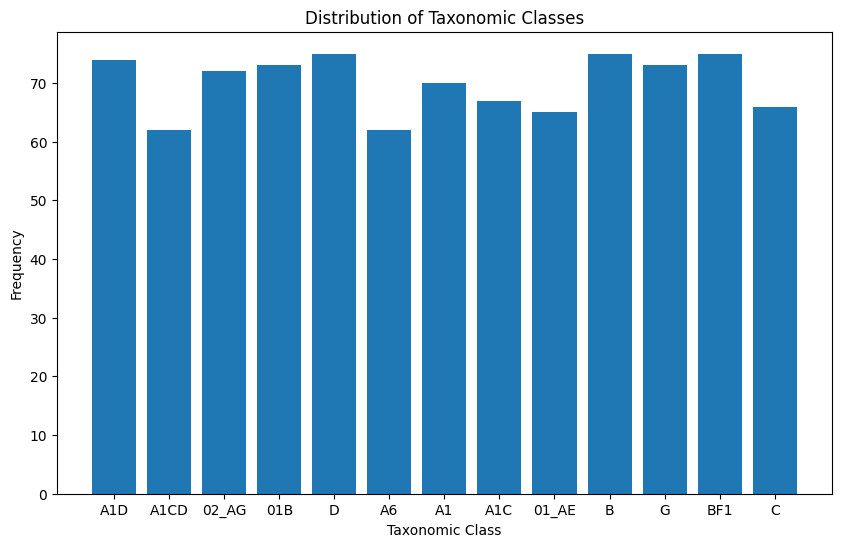

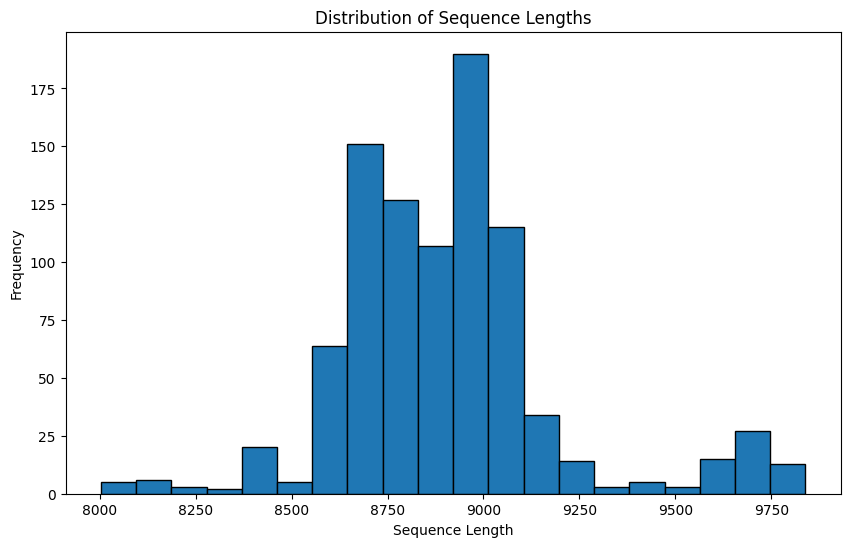

In [6]:
from Bio import SeqIO
import matplotlib.pyplot as plt
from collections import Counter

# Read and parse the FASTA file
fasta_file = "HIV_data/train_data.fasta"  # Replace with your file path
sequences = []
labels = []

for record in SeqIO.parse(fasta_file, "fasta"):
    sequences.append(str(record.seq))
    label = record.description.split('|')[1]  # Extract the taxonomic class
    labels.append(label)

# Plot the distribution of labels
label_counts = Counter(labels)
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Taxonomic Class')
plt.ylabel('Frequency')
plt.title('Distribution of Taxonomic Classes')
plt.show()

# Plot the distribution of sequence lengths
sequence_lengths = [len(seq) for seq in sequences]
plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=20, edgecolor='black')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()



### 2.2 Preprocessing DNA Sequences: Computing K-mer Frequencies

K-mer frequencies can be used as input features for classification models. Let's compute the k-mer frequencies for each DNA sequence.


In [ ]:

from itertools import product

# Function to calculate k-mer frequency
def kmer_frequency(sequence, k=3):
    kmers = [''.join(p) for p in product('ACGT', repeat=k)]
    freq_dict = {kmer: 0 for kmer in kmers}
    
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i+k]
        if kmer in freq_dict:
            freq_dict[kmer] += 1
    
    total_kmers = sum(freq_dict.values())
    return [freq_dict[kmer] / total_kmers for kmer in kmers]  # Normalize frequencies

# Compute k-mer frequencies for each sequence
k = 3  # Set k
features = [kmer_frequency(seq, k) for seq in sequences]



### 2.3 Defining and Training the Neural Network

With the k-mer frequency features, we'll design a fully connected neural network for taxonomic classification using the architecture provided.

#### Model Architecture: `Net_linear`
This model includes three fully connected layers with ReLU activations and Dropout for regularization. The final layer uses Softmax to output class probabilities.


In [8]:

import torch.nn as nn
import torch

# Define the Net_linear model
class Net_linear(nn.Module):
    def __init__(self, n_input, n_output):
        super(Net_linear, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(n_input, 512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(64, n_output),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, n_input)  # Ensure input is flattened if necessary
        out = self.classifier(x)
        return out

# Define input and output dimensions
n_input = len(features[0])  # Based on k-mer feature size
n_output = len(set(labels))  # Number of unique classes

# Initialize the model
model = Net_linear(n_input=n_input, n_output=n_output)
print(model)


Net_linear(
  (classifier): Sequential(
    (0): Linear(in_features=4096, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=64, out_features=13, bias=True)
    (7): Softmax(dim=1)
  )
)


In [9]:

# Set up the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

# Convert features and labels to tensors and create DataLoader
# Mapping labels to integers
label_map = {label: idx for idx, label in enumerate(set(labels))}
mapped_labels = [label_map[lbl] for lbl in labels]

features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(mapped_labels, dtype=torch.long)
dataset = TensorDataset(features_tensor, labels_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Note: This model can be tuned further by adjusting batch size, learning rate, or Dropout rates


Epoch [1/100], Loss: 2.5638
Epoch [2/100], Loss: 2.5608
Epoch [3/100], Loss: 2.5672
Epoch [4/100], Loss: 2.4908
Epoch [5/100], Loss: 2.4405
Epoch [6/100], Loss: 2.5657
Epoch [7/100], Loss: 2.4418
Epoch [8/100], Loss: 2.3936
Epoch [9/100], Loss: 2.4134
Epoch [10/100], Loss: 2.2699
Epoch [11/100], Loss: 2.4927
Epoch [12/100], Loss: 2.3587
Epoch [13/100], Loss: 2.3324
Epoch [14/100], Loss: 2.3115
Epoch [15/100], Loss: 2.0589
Epoch [16/100], Loss: 2.2674
Epoch [17/100], Loss: 2.4133
Epoch [18/100], Loss: 2.1313
Epoch [19/100], Loss: 2.1630
Epoch [20/100], Loss: 2.0403
Epoch [21/100], Loss: 2.1454
Epoch [22/100], Loss: 2.0681
Epoch [23/100], Loss: 2.1137
Epoch [24/100], Loss: 2.1560
Epoch [25/100], Loss: 2.2619
Epoch [26/100], Loss: 2.0454
Epoch [27/100], Loss: 2.0179
Epoch [28/100], Loss: 1.8624
Epoch [29/100], Loss: 2.1153
Epoch [30/100], Loss: 2.3355
Epoch [31/100], Loss: 2.1000
Epoch [32/100], Loss: 2.0795
Epoch [33/100], Loss: 2.0293
Epoch [34/100], Loss: 1.8400
Epoch [35/100], Loss: 2


### 2.4 Evaluating on the Test Set

After training, it's important to evaluate the model on a separate test set to understand its performance on unseen data.

We'll split our dataset further or use a held-out test set to compute accuracy, plot a confusion matrix, and evaluate other metrics if necessary.


Test Accuracy: 0.9313


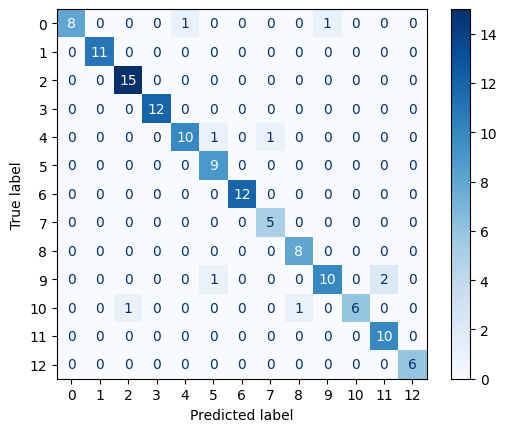

In [10]:

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd


fasta_file = "HIV_data/val_data.fasta"  # Replace with your file path
sequences = []
ids = []

for record in SeqIO.parse(fasta_file, "fasta"):
    sequences.append(str(record.seq))
    label = record.description[0]  # Extract the tid
    ids.append(label)

val_features = [kmer_frequency(seq, k) for seq in sequences]
val_labels = pd.read_csv("HIV_data/val_taxonomy.csv")["taxonomy"].to_list()
mapped_val_labels = [label_map[lbl] for lbl in val_labels]

val_features = torch.tensor(val_features, dtype=torch.float32)
val_labels_tensor = torch.tensor(mapped_val_labels, dtype=torch.long)

# Create DataLoader for test set
test_dataset = TensorDataset(val_features, val_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluation
model.eval()  # Set model to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(targets.numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


> ### Question:
> Why is it not working? Can we fix it?


### 2.5 Hyperparameter Tuning

Tuning hyperparameters such as the learning rate, number of layers, or dropout rates can significantly impact model performance.

We'll run a small grid search to experiment with different learning rates and dropout probabilities. After each run, we can compare results to find the best configuration.


In [11]:

# Hyperparameter tuning - experimenting with different learning rates and dropout rates
learning_rates = [0.001, 0.0001]
dropout_rates = [0.3, 0.5]

best_accuracy = 0
best_params = None

for lr in learning_rates:
    for dropout in dropout_rates:
        print(f"Training with learning rate: {lr}, dropout: {dropout}")
        
        # Define model with current dropout rate
        class TunedNet(nn.Module):
            def __init__(self, n_input, n_output):
                super(TunedNet, self).__init__()
                self.classifier = nn.Sequential(
                    nn.Linear(n_input, 512),
                    nn.ReLU(),
                    nn.Dropout(p=dropout),
                    nn.Linear(512, 64),
                    nn.ReLU(),
                    nn.Dropout(p=dropout),
                    nn.Linear(64, n_output),
                    nn.Softmax(dim=1)
                )

            def forward(self, x):
                x = x.view(-1, n_input)  # Ensure input is flattened
                out = self.classifier(x)
                return out

        # Initialize model, criterion, and optimizer
        model = TunedNet(n_input=n_input, n_output=n_output)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        
        # Training loop (shortened for demonstration purposes)
        for epoch in range(5):  # Use fewer epochs for tuning
            model.train()
            for inputs, targets in dataloader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        
        # Evaluate on validation/test set
        model.eval()
        all_preds = []
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                all_preds.extend(predicted.numpy())
        
        accuracy = accuracy_score(mapped_val_labels, all_preds)
        print(f"Validation Accuracy: {accuracy:.4f}")
        
        # Update best parameters if current model is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'learning_rate': lr, 'dropout': dropout}

print(f"Best Accuracy: {best_accuracy:.4f} with parameters: {best_params}")


Training with learning rate: 0.001, dropout: 0.3
Validation Accuracy: 0.0382
Training with learning rate: 0.001, dropout: 0.5
Validation Accuracy: 0.0611
Training with learning rate: 0.0001, dropout: 0.3
Validation Accuracy: 0.0687
Training with learning rate: 0.0001, dropout: 0.5
Validation Accuracy: 0.0458
Best Accuracy: 0.0687 with parameters: {'learning_rate': 0.0001, 'dropout': 0.3}


> ### Quesion: Can we get rid of feature engineering? Can we train a CNN? Is this dataset a good candidate? Why?


## Part 3: Training a 1D Convolutional Neural Network (CNN)

In this final part, we'll train a 1D CNN to classify DNA sequences. This approach involves:

1. **Setting a Maximum Length**: We'll define a maximum sequence length, then trim or pad all sequences to this length.
2. **One-Hot Encoding DNA Sequences**: Convert sequences to one-hot encoding, so that each base (A, C, G, T) is represented in a way compatible with convolutional layers.
3. **Defining and Training the CNN**: We'll use the CNN architecture provided, with five convolutional layers and four fully connected layers.



### 3.1 Setting a Maximum Sequence Length

Convolutional networks require fixed-length inputs. We'll set a maximum sequence length and either trim longer sequences or pad shorter sequences to this length.


In [18]:

import numpy as np


# Read and parse the FASTA file
fasta_file = "HIV_data/train_data.fasta"  # Replace with your file path
sequences = []
labels = []

for record in SeqIO.parse(fasta_file, "fasta"):
    sequences.append(str(record.seq))
    label = record.description.split('|')[1]  # Extract the taxonomic class
    labels.append(label)


# Define the maximum length for the sequences
max_len = 9500  # Adjust this as needed based on dataset characteristics

# Trim or pad sequences
def pad_or_trim_sequence(sequence, max_len):
    if len(sequence) > max_len:
        return sequence[:max_len]
    else:
        return sequence + 'N' * (max_len - len(sequence))  # Pad with 'N' for unknowns

# Apply to all sequences
processed_sequences = [pad_or_trim_sequence(seq, max_len) for seq in sequences]
print("Sample processed sequence", processed_sequences[0][:10],'...')


Sample processed sequence GATGGGTGCG ...



### 3.2 One-Hot Encoding DNA Sequences

To prepare the sequences for input into a 1D CNN, we will convert each base (A, C, G, T) into a one-hot encoding vector.


In [ ]:
# Define one-hot encoding for each base
def one_hot_encode(sequence, max_len):
    encoding_dict = {
        'A': [1, 0, 0, 0],
        'C': [0, 1, 0, 0],
        'G': [0, 0, 1, 0],
        'T': [0, 0, 0, 1],
        'N': [0, 0, 0, 0]  # Placeholder for padding/unknowns
    }
    encoded_seq = [encoding_dict[base] for base in sequence]
    return np.array(encoded_seq).T  # Transpose to shape (4, max_len)

# Encode all sequences
encoded_sequences = [one_hot_encode(seq, max_len) for seq in processed_sequences]
encoded_sequences = np.stack(encoded_sequences)  # Stack into a single numpy array

# Convert to PyTorch tensor and add a dimension for CNN input
input_tensor = torch.tensor(encoded_sequences, dtype=torch.float32)  # Shape: (batch_size, 1, 4, max_len)
print("Shape of input tensor:", input_tensor.shape)


Shape of input tensor: torch.Size([909, 4, 9500])



### 3.3 Defining and Training the CNN

We'll define the CNN architecture with five convolutional layers and four fully connected layers as provided. Each convolutional layer is followed by a ReLU activation, max pooling, batch normalization, and dropout for regularization.


In [77]:
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN model
class CNN(nn.Module):
    def __init__(self, n_input, n_output, w, stride=3):
        super(CNN, self).__init__()
        
        # 5 convolutional layers
        self.conv1 = nn.Conv1d(4, 8, w, stride=stride)
        self.conv2 = nn.Conv1d(8, 16, w, stride=stride)
        self.conv3 = nn.Conv1d(16, 32, w, stride=stride-1)
        self.conv4 = nn.Conv1d(32, 64, w, stride=stride-1)
        self.conv5 = nn.Conv1d(64, 128, w, stride=stride-1)

        # Fully connected layers
        self.fc1 = nn.Linear(256, 64)
        self.fc2 = nn.Linear(64, n_output)

        # Max Pool Layer (used after each convolution)
        self.pool = nn.MaxPool1d(2, 2)
        
        # Dropout and Batch Normalization
        self.dropout = nn.Dropout(p=0.2)
        self.norm1 = nn.BatchNorm1d(8)
        self.norm2 = nn.BatchNorm1d(16)
        self.norm3 = nn.BatchNorm1d(32)
        self.norm4 = nn.BatchNorm1d(64)
        self.norm5 = nn.BatchNorm1d(128)


    def forward(self, x):
        # Convolutional layers with batch norm, ReLU, and max pooling
        x = self.pool(F.relu(self.norm1(self.conv1(x))))
        x = self.pool(F.relu(self.norm2(self.conv2(x))))
        x = self.pool(F.relu(self.norm3(self.conv3(x))))
        x = self.pool(F.relu(self.norm4(self.conv4(x))))
        x = self.pool(F.relu(self.norm5(self.conv5(x))))
        
        # Flatten the output
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        
        return x

# Define model with input and output dimensions
n_input = 4 * max_len  # 4 channels (one-hot encoding) by max_len
n_output = len(set(labels))  # Number of classes

# Initialize the model
model = CNN(n_input=n_input, n_output=n_output, w=6)  # Using kernel size of 6
print(model)


CNN(
  (conv1): Conv1d(4, 8, kernel_size=(6,), stride=(3,))
  (conv2): Conv1d(8, 16, kernel_size=(6,), stride=(3,))
  (conv3): Conv1d(16, 32, kernel_size=(6,), stride=(2,))
  (conv4): Conv1d(32, 64, kernel_size=(6,), stride=(2,))
  (conv5): Conv1d(64, 128, kernel_size=(6,), stride=(2,))
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=13, bias=True)
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (norm1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [78]:
# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Convert labels to integer mapping and set up DataLoader
label_map = {label: idx for idx, label in enumerate(set(labels))}
mapped_labels = [label_map[lbl] for lbl in labels]

labels_tensor = torch.tensor(mapped_labels, dtype=torch.long)
dataset = TensorDataset(input_tensor, labels_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for inputs, targets in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}")

print("Training complete!")

Epoch [1/50], Loss: 2.4292
Epoch [2/50], Loss: 1.7853
Epoch [3/50], Loss: 1.0584
Epoch [4/50], Loss: 0.3891
Epoch [5/50], Loss: 0.1358
Epoch [6/50], Loss: 0.0632
Epoch [7/50], Loss: 0.0347
Epoch [8/50], Loss: 0.0238
Epoch [9/50], Loss: 0.0170
Epoch [10/50], Loss: 0.0147
Epoch [11/50], Loss: 0.0090
Epoch [12/50], Loss: 0.0085
Epoch [13/50], Loss: 0.0069
Epoch [14/50], Loss: 0.0055
Epoch [15/50], Loss: 0.0059
Epoch [16/50], Loss: 0.0043
Epoch [17/50], Loss: 0.0030
Epoch [18/50], Loss: 0.0037
Epoch [19/50], Loss: 0.0027
Epoch [20/50], Loss: 0.0031
Epoch [21/50], Loss: 0.0024
Epoch [22/50], Loss: 0.0034
Epoch [23/50], Loss: 0.0046
Epoch [24/50], Loss: 0.0049
Epoch [25/50], Loss: 0.0028
Epoch [26/50], Loss: 0.0024
Epoch [27/50], Loss: 0.0048
Epoch [28/50], Loss: 0.3068
Epoch [29/50], Loss: 1.2150
Epoch [30/50], Loss: 0.2772
Epoch [31/50], Loss: 0.0954
Epoch [32/50], Loss: 0.0398
Epoch [33/50], Loss: 0.0264
Epoch [34/50], Loss: 0.0131
Epoch [35/50], Loss: 0.0056
Epoch [36/50], Loss: 0.0038
E

### 3.4 Evaluation on the validatoin set

Similary to what we did in the previous version, we need to load the data from the validation partition and run the trained model for inference

Shape of input tensor: torch.Size([909, 4, 9500])
Test Accuracy: 0.5496


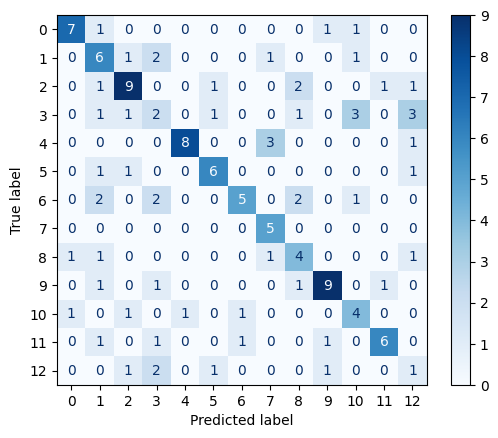

In [79]:

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd


fasta_file = "HIV_data/val_data.fasta"  # Replace with your file path
sequences = []
ids = []

for record in SeqIO.parse(fasta_file, "fasta"):
    sequences.append(str(record.seq))
    label = record.description[0]  # Extract the tid
    ids.append(label)

processed_sequences = [pad_or_trim_sequence(seq, max_len) for seq in sequences]


# Encode all sequences
encoded_sequences = [one_hot_encode(seq, max_len) for seq in processed_sequences]
encoded_sequences = np.stack(encoded_sequences)  # Stack into a single numpy array

# Convert to PyTorch tensor and add a dimension for CNN input
val_features = torch.tensor(encoded_sequences, dtype=torch.float32)  # Shape: (batch_size, 4, max_len)
print("Shape of input tensor:", input_tensor.shape)


val_labels = pd.read_csv("HIV_data/val_taxonomy.csv")["taxonomy"].to_list()
mapped_val_labels = [label_map[lbl] for lbl in val_labels]
val_labels_tensor = torch.tensor(mapped_val_labels, dtype=torch.long)

# Create DataLoader for test set
test_dataset = TensorDataset(val_features, val_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluation
model.eval()  # Set model to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(targets.numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


> ### Question:
> Why is it not working? Can we fix it?